In [5]:
import pandas as pd
from pathlib import Path


In [4]:
ind = ['a', 'a', 'b', 'c', 'b', 'a', 'd']
df = pd.DataFrame({'A': list(range(len(ind))), 'B': list(range(len(ind),len(ind)*2))}, index=ind)

def suffix_dupIndex(df):
    dup_labels = df.index.duplicated(keep=False)
    dup_count = dup_labels.sum()
    if dup_count > 0:
        new_labels = []
        label_counts = {}
        for i, label in enumerate(df.index):
            if label in label_counts:
                label_counts[label] += 1
                new_labels.append(f"{label}_{label_counts[label]+1}")
            else:
                label_counts[label] = 0
                if dup_labels[i]:
                    new_labels.append(f"{label}_{label_counts[label]+1}")
                else:
                    new_labels.append(label)
        df.index = new_labels
        return df

suffix_dupIndex(df)

,A,B
a_1,0,7
a_2,1,8
b_1,2,9
c,3,10
b_2,4,11
a_3,5,12
d,6,13


In [21]:
def getPath(section, data_split):
    file_dir = str((Path().absolute()).parents[0]) + f"/PL-Marker/_statistics_data/{section}"
    ent_path = f"{file_dir}/{data_split}_ent.csv"
    rel_path = f"{file_dir}/{data_split}_rel.csv"
    return ent_path, rel_path

In [29]:
section = 'summary'
data_split = 'train'

ent_path, rel_path = getPath(section, data_split)
df_ent = pd.read_csv(ent_path, index_col=0)
df_ent

,paper_id,summary,Method,OtherScientificTerm,Task,Generic,Material,Metric
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,This paper investigates kernel ridge - less re...,3,2,1,0,0,0
0,SP:b80bc890180934092cde037b49d94d6e4e06fad9,This paper presents a novel way of making full...,5,4,0,1,0,0
0,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,This paper proposes a new framework that compu...,2,2,1,6,0,0
0,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This work proposes a deep reinforcement learni...,4,1,3,2,0,0
0,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,This paper proposes 3 deep generative models b...,7,3,4,2,0,0
...,...,...,...,...,...,...,...,...
0,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,This paper presents a RNN - RL based method fo...,1,3,1,4,1,0
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper proposes a new pointwise convolutio...,5,1,1,2,0,0
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper presents a new pointwise convolutio...,6,5,1,4,1,2
0,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,This paper proposes to model various uncertain...,8,6,7,1,0,2


In [31]:
df_rel = pd.read_csv(rel_path, index_col=0)
df_rel

,paper_id,summary,PART-OF,USED-FOR,FEATURE-OF,CONJUNCTION,EVALUATE-FOR,HYPONYM-OF,COMPARE
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,This paper investigates kernel ridge - less re...,0,3,0,0,0,0,0
0,SP:b80bc890180934092cde037b49d94d6e4e06fad9,This paper presents a novel way of making full...,0,5,1,1,0,0,0
0,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,This paper proposes a new framework that compu...,0,4,0,1,2,0,0
0,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This work proposes a deep reinforcement learni...,0,5,0,0,0,0,0
0,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,This paper proposes 3 deep generative models b...,0,5,0,4,1,5,0
...,...,...,...,...,...,...,...,...,...
0,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,This paper presents a RNN - RL based method fo...,0,1,0,0,0,0,0
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper proposes a new pointwise convolutio...,0,8,0,1,0,0,0
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper presents a new pointwise convolutio...,0,4,0,1,4,2,2
0,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,This paper proposes to model various uncertain...,1,11,0,0,2,1,1


In [ ]:

torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.set_device(0)
torch.cuda.device(i)
torch.cuda.get_device_name(i)

In [3]:
torch.cuda.device_count()

2

In [4]:
from pynvml import *
gb = pow(1024,3)
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {info.total/gb:.2f} GB')
print(f'free     : {info.free/gb:.2f} GB')
print(f'used     : {info.used/gb:.2f} GB')

total    : 47.99 GB
free     : 27.50 GB
used     : 20.49 GB


In [13]:
pow(2,10)

1024

# Load Raw Data

In [6]:
import sys
import json
from pathlib import Path
import pandas as pd

In [7]:
RAWDATA_FILES = {
    "train": "training_complete.jsonl",
    "val": "validation_complete.jsonl",
    "test": "testing_with_paper_release.jsonl"
}
RAWDATA_DIR = str((Path().absolute()).parents[0])+"/dataset_MuP/"

In [34]:
def print_progress(curr, full, desc='', bar_size=50):    
    bar = int((curr+1)/full*bar_size)
    sys.stdout.write(f"\r{desc}[{'='*bar}{' '*(bar_size-bar)}] {curr+1}/{full}")
    sys.stdout.flush()

def load_summary(filepath):
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    dataset = []
    data_len = len(json_list)
    cannot_import = 0
    num_sum = {}
    for i, json_str in enumerate(json_list):
        result = json.loads(json_str)
        try:
            paper_id = result["paper_id"]
            if paper_id not in list(num_sum.keys()): num_sum[paper_id] = 1
            else: num_sum[paper_id] += 1
            dataset.append({
                "paper_id": paper_id,
                "summary_num": num_sum[paper_id],
                "summary_id": f"{paper_id}:{num_sum[paper_id]}",
                "sentences": result["summary"]
            })
        except:                
            cannot_import += 1
    print(f"\nSuccessfully import {data_len-cannot_import}/{data_len} samples")
    return num_sum, pd.DataFrame(dataset)

In [45]:
num_sum, dataset = load_summary(filepath = RAWDATA_DIR+RAWDATA_FILES["val"])
dataset


Successfully import 3604/3604 samples


,paper_id,summary_num,summary_id,sentences
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96:1,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96:2,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,3,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96:3,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,1,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187:1,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,2,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187:2,This paper proposes a method to introduce **pr...
...,...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,2,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6:2,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,3,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6:3,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,1,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204:1,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,2,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204:2,The authors propose using non-Euclidean spaces...


In [29]:
list_num_sum = []
for k,v in num_sum.items():
    list_num_sum.append({
        "paper_id": k,
        "num_sum": v
    })
df_num_sum = pd.DataFrame(list_num_sum)

In [31]:
df_num_sum.groupby("num_sum")

,paper_id,num_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,3
1,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,3
2,SP:e3e728837f26acb9da283a42c219b6c3b3e131cb,3
3,SP:97911e02bf06b34d022e7548beb5169a1d825903,3
4,SP:59f9de3ebe4a04d2fc8778d8e3415bf85efb7822,3


In [41]:
def getPath(section, data_split):
    file_dir = str((Path().absolute()).parents[0]) + f"/PL-Marker/_statistics_data/{section}"
    ent_path = f"{file_dir}/{data_split}_ent.csv"
    rel_path = f"{file_dir}/{data_split}_rel.csv"
    return ent_path, rel_path

In [48]:
section = 'summary'
data_split = 'train'

ent_path, rel_path = getPath(section, data_split)
df_ent = pd.read_csv(ent_path, index_col=0)
df_ent.reset_index(drop=True, inplace=True)
df_ent

,paper_id,summary,Method,OtherScientificTerm,Task,Generic,Material,Metric
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,This paper investigates kernel ridge - less re...,3,2,1,0,0,0
1,SP:b80bc890180934092cde037b49d94d6e4e06fad9,This paper presents a novel way of making full...,5,4,0,1,0,0
2,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,This paper proposes a new framework that compu...,2,2,1,6,0,0
3,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This work proposes a deep reinforcement learni...,4,1,3,2,0,0
4,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,This paper proposes 3 deep generative models b...,7,3,4,2,0,0
...,...,...,...,...,...,...,...,...
18929,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,This paper presents a RNN - RL based method fo...,1,3,1,4,1,0
18930,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper proposes a new pointwise convolutio...,5,1,1,2,0,0
18931,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper presents a new pointwise convolutio...,6,5,1,4,1,2
18932,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,This paper proposes to model various uncertain...,8,6,7,1,0,2


# KNN CLustering

In [49]:
from sklearn.cluster import KMeans
import numpy as np

In [55]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, random_state=42)
X.shape

(100, 2)

In [40]:
print(y[:20])

[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2]


In [60]:
X = np.array([
    list(df_ent['Method']),
    list(df_ent['Task']),
    list(df_ent['Material']),
    list(df_ent['Metric']),
]).T

In [61]:
X.shape

(18934, 4)

In [63]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.predict(X)
labels[:20]

array([3, 1, 3, 0, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 1],
      dtype=int32)

In [66]:
df_ent["clusters_1"] = labels
df_ent

,paper_id,summary,Method,OtherScientificTerm,Task,Generic,Material,Metric,clusters_1
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,This paper investigates kernel ridge - less re...,3,2,1,0,0,0,3
1,SP:b80bc890180934092cde037b49d94d6e4e06fad9,This paper presents a novel way of making full...,5,4,0,1,0,0,1
2,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,This paper proposes a new framework that compu...,2,2,1,6,0,0,3
3,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This work proposes a deep reinforcement learni...,4,1,3,2,0,0,0
4,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,This paper proposes 3 deep generative models b...,7,3,4,2,0,0,1
...,...,...,...,...,...,...,...,...,...
18929,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,This paper presents a RNN - RL based method fo...,1,3,1,4,1,0,3
18930,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper proposes a new pointwise convolutio...,5,1,1,2,0,0,1
18931,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper presents a new pointwise convolutio...,6,5,1,4,1,2,1
18932,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,This paper proposes to model various uncertain...,8,6,7,1,0,2,0


# Character of each cluster

In [ ]:

    list(df_ent['Method']),
    list(df_ent['Task']),
    list(df_ent['Material']),
    list(df_ent['Metric']),

In [71]:
df_boxplot = pd.DataFrame()
for i in range(4):
    df_boxplot_ = pd.melt(df_ent[df_ent['clusters_1']==i], value_vars=['Task', 'Material', 'Method', 'Metric'], var_name="entity_type")
    df_boxplot_['cluster'] = i+1
    df_boxplot = pd.concat([df_boxplot, df_boxplot_])
df_boxplot

,entity_type,value,cluster
0,Task,3,1
1,Task,2,1
2,Task,6,1
3,Task,4,1
4,Task,2,1
...,...,...,...
37535,Metric,0,4
37536,Metric,0,4
37537,Metric,0,4
37538,Metric,0,4


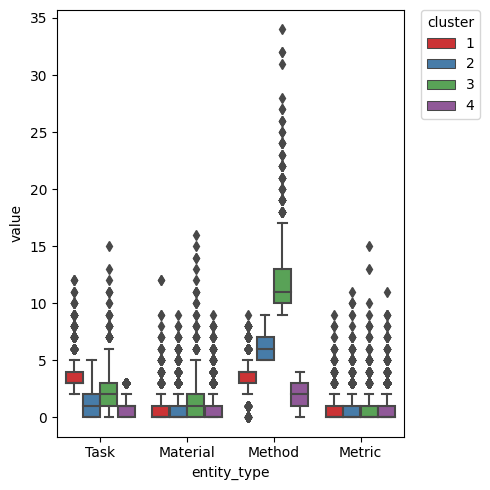

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

# plt.figure(figsize=(5, 4)) #for a bigger image
sns.boxplot(x="entity_type", y="value", hue="cluster", data=df_boxplot, palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), title="cluster", loc='upper left', borderaxespad=0)